In [1]:
%matplotlib inline

In [2]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']


In [3]:
from cosmodc2.sdss_colors import analytical_colors


In [4]:
from astropy.table import Table
npts = int(2e4)
mock = Table()
magr_min, magr_max = -26, -5
mock['Mr'] = np.random.uniform(magr_min, magr_max, npts)


In [5]:
__=reload(analytical_colors)
mock['gr'] = analytical_colors.g_minus_r(mock['Mr'])
mock['ri'] = analytical_colors.r_minus_i(mock['Mr'])

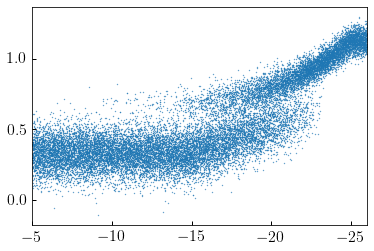

In [6]:
fig, ax = plt.subplots(1, 1)

__=ax.scatter(mock['Mr'], mock['gr'], s=0.1)

xlim = ax.set_xlim(magr_max, magr_min)

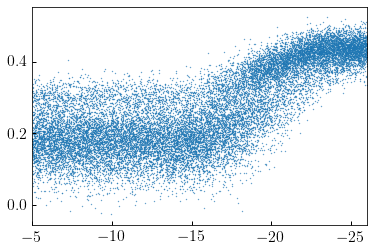

In [7]:
fig, ax = plt.subplots(1, 1)

__=ax.scatter(mock['Mr'], mock['ri'], s=0.1)

xlim = ax.set_xlim(magr_max, magr_min)

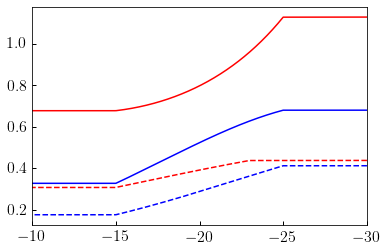

In [11]:
__=reload(analytical_colors)

xmin, xmax = -30, -10
mrtest = np.linspace(xmin, xmax, 1000)

blue_peak_gr = analytical_colors.main_sequence_peak_gr(mrtest)
red_peak_gr = analytical_colors.red_sequence_peak_gr(mrtest)
blue_peak_ri = analytical_colors.main_sequence_peak_ri(mrtest)
red_peak_ri = analytical_colors.red_sequence_peak_ri(mrtest)

fig, ax = plt.subplots(1, 1)

__=ax.plot(mrtest, blue_peak_gr, color='blue')
__=ax.plot(mrtest, red_peak_gr, color='red')
__=ax.plot(mrtest, blue_peak_ri, '--', color='blue')
__=ax.plot(mrtest, red_peak_ri, '--', color='red')

xlim = ax.set_xlim(xmax, xmin)

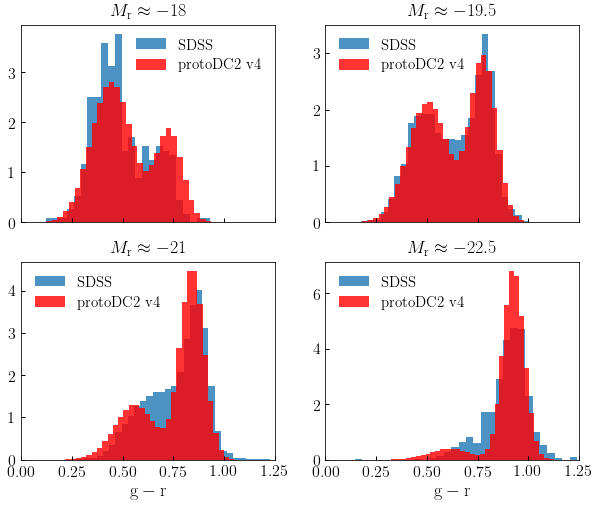

In [12]:
npts = int(1e6)

from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
__=reload(analytical_colors)

magr_max = -18.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr18 = sdss['restframe_extincted_sdss_gr'][mask]
gr18 = analytical_colors.g_minus_r(np.zeros(npts) + magr_max)

magr_max = -19.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr19p5 = sdss['restframe_extincted_sdss_gr'][mask]
gr19p5 = analytical_colors.g_minus_r(np.zeros(npts) + magr_max)

magr_max = -21.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr21 = sdss['restframe_extincted_sdss_gr'][mask]
gr21 = analytical_colors.g_minus_r(np.zeros(npts) + magr_max)

magr_max = -22.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr22p5 = sdss['restframe_extincted_sdss_gr'][mask]
gr22p5 = analytical_colors.g_minus_r(np.zeros(npts) + magr_max)


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))

((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

nbins = 40

__=ax1.hist(sdss_sample_gr18, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax1.hist(gr18, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax2.hist(sdss_sample_gr19p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax2.hist(gr19p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax3.hist(sdss_sample_gr21, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax3.hist(gr21, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax4.hist(sdss_sample_gr22p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax4.hist(gr22p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

for ax in axes:
    xlim = ax.set_xlim(0, 1.25)
    leg = ax.legend()

ax1.set_xticklabels([''])
ax2.set_xticklabels([''])
title1 = ax1.set_title(r'$M_{\rm r} \approx -18$')
title2 = ax2.set_title(r'$M_{\rm r} \approx -19.5$')
title3 = ax3.set_title(r'$M_{\rm r} \approx -21$')
title4 = ax4.set_title(r'$M_{\rm r} \approx -22.5$')
xlabel3 = ax3.set_xlabel(r'${\rm g-r}$')
xlabel4 = ax4.set_xlabel(r'${\rm g-r}$')


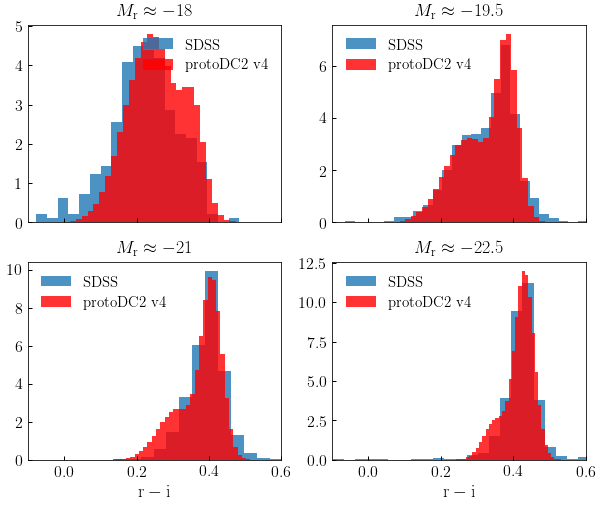

In [13]:
npts = int(1e6)

from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask
__=reload(analytical_colors)


magr_max = -18.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri18 = sdss['restframe_extincted_sdss_ri'][mask]
ri18 = analytical_colors.r_minus_i(np.zeros(npts) + magr_max)

magr_max = -19.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri19p5 = sdss['restframe_extincted_sdss_ri'][mask]
ri19p5 = analytical_colors.r_minus_i(np.zeros(npts) + magr_max)

magr_max = -21.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri21 = sdss['restframe_extincted_sdss_ri'][mask]
ri21 = analytical_colors.r_minus_i(np.zeros(npts) + magr_max)

magr_max = -22.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_ri22p5 = sdss['restframe_extincted_sdss_ri'][mask]
ri22p5 = analytical_colors.r_minus_i(np.zeros(npts) + magr_max)


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))

((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

nbins = 40

__=ax1.hist(sdss_sample_ri18, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax1.hist(ri18, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax2.hist(sdss_sample_ri19p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax2.hist(ri19p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax3.hist(sdss_sample_ri21, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax3.hist(ri21, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax4.hist(sdss_sample_ri22p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax4.hist(ri22p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

for ax in axes:
    xlim = ax.set_xlim(-0.1, 0.6)
    leg = ax.legend()

ax1.set_xticklabels([''])
ax2.set_xticklabels([''])
title1 = ax1.set_title(r'$M_{\rm r} \approx -18$')
title2 = ax2.set_title(r'$M_{\rm r} \approx -19.5$')
title3 = ax3.set_title(r'$M_{\rm r} \approx -21$')
title4 = ax4.set_title(r'$M_{\rm r} \approx -22.5$')
xlabel3 = ax3.set_xlabel(r'${\rm r-i}$')
xlabel4 = ax4.set_xlabel(r'${\rm r-i}$')
